# **Name: Shruti Bhavsar**

**LetsGrowMore- Virtual Internship Program**

***Beginner Level Task***

**Task 1: Stock Market Prediction and Forecasting using Stacked LSTM**

In [ ]:
import pandas_datareader as pdr
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [ ]:
#Loading the Dataset
stock = pd.read_csv('/content/NSE-TATAGLOBAL 1.csv')
stock.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,28/09/2018,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
1,27/09/2018,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2,26/09/2018,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
3,25/09/2018,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
4,24/09/2018,233.55,239.20,230.75,234.00,233.30,3423509,7999.55


In [ ]:
# Get the 'Close' values
stock_close = df.reset_index()['Close']

In [ ]:
stock_close.shape

(2035,)

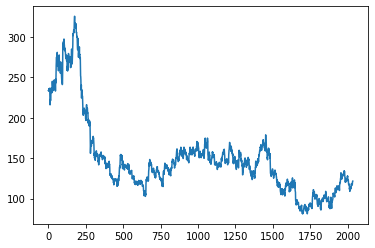

In [ ]:
plt.plot(stock_close)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
stock_close = scaler.fit_transform(np.array(stock_close).reshape(-1, 1))
stock_close.shape

(2035, 1)

In [ ]:
#Testing and Training the data
# split train & test
train_size = int(len(stock_close)*0.65)
test_size = len(stock_close) - train_size
train_data, test_data = stock_close[0:train_size,:], stock_close[train_size:len(stock),:1]

In [ ]:
import numpy
# convert values to dataset matrix
def create_dataset(dataset, time_step = 1):
  dataX, dataY = [], []
  for i in range(len(dataset) - time_step - 1):
    a = dataset[i:(i+time_step), 0]
    dataX.append(a)
    dataY.append(dataset[i + time_step, 0])
  return numpy.array(dataX), numpy.array(dataY)

In [ ]:
time_step=100
X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)

In [ ]:
print(X_train)

[[0.62418301 0.62214052 0.62622549 ... 0.83455882 0.86213235 0.85273693]
 [0.62214052 0.62622549 0.63378268 ... 0.86213235 0.85273693 0.87111928]
 [0.62622549 0.63378268 0.62234477 ... 0.85273693 0.87111928 0.84497549]
 ...
 [0.34517974 0.31781046 0.33047386 ... 0.2816585  0.27001634 0.26531863]
 [0.31781046 0.33047386 0.32128268 ... 0.27001634 0.26531863 0.27389706]
 [0.33047386 0.32128268 0.34007353 ... 0.26531863 0.27389706 0.25347222]]


In [ ]:
print(X_train.shape), print(y_train.shape)

(1221, 100)
(1221,)


(None, None)

In [ ]:
print(X_test.shape), print(y_test.shape)

(612, 100)
(612,)


(None, None)

In [ ]:
# reshape input to 3D [samples, time steps, features]
# 3D input required for LSTM
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

In [ ]:
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(100,1)))
model.add(LSTM(50, return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
# compile model
model.compile(loss='mean_squared_error', optimizer='adam')

In [ ]:
# Show model summary
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 100, 50)           10400     
_________________________________________________________________
lstm_1 (LSTM)                (None, 100, 50)           20200     
_________________________________________________________________
lstm_2 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense (Dense)                (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100, batch_size=64, verbose=1)

Epoch 1/100
20/20 [==============================] - 4s 200ms/step - loss: 2.4571e-04 - val_loss: 2.2442e-04
Epoch 2/100
20/20 [==============================] - 4s 193ms/step - loss: 2.6469e-04 - val_loss: 3.4611e-04
Epoch 3/100
20/20 [==============================] - 4s 199ms/step - loss: 3.2939e-04 - val_loss: 3.2609e-04
Epoch 4/100
20/20 [==============================] - 4s 199ms/step - loss: 2.9736e-04 - val_loss: 4.8599e-04
Epoch 5/100
20/20 [==============================] - 4s 197ms/step - loss: 4.1459e-04 - val_loss: 2.7418e-04
Epoch 6/100
20/20 [==============================] - 4s 195ms/step - loss: 3.2684e-04 - val_loss: 2.5244e-04
Epoch 7/100
20/20 [==============================] - 4s 196ms/step - loss: 2.5990e-04 - val_loss: 2.6273e-04
Epoch 8/100
20/20 [==============================] - 4s 199ms/step - loss: 2.8364e-04 - val_loss: 2.2193e-04
Epoch 9/100
20/20 [==============================] - 4s 197ms/step - loss: 2.4215e-04 - val_loss: 2.1885e-04
Epoch 10/100
20/20 

**Prediction & Performance Metrics**

In [ ]:
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

In [ ]:
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)

In [ ]:
import math
from sklearn.metrics import mean_squared_error

# Calculate the RMSE performance metrics
math.sqrt(mean_squared_error(y_train, train_predict))

166.5506547938878

In [ ]:
# test the data RMSE
math.sqrt(mean_squared_error(y_test, test_predict))

116.29587386052253

**Plotting the Results**

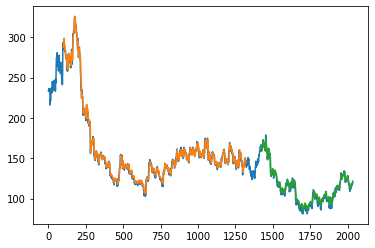

In [ ]:
# shift the train predictions for plotting
look_back = 100
trainPredictPlot = np.empty_like(stock_close)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict

# shift the test predictions for plotting
testPredictPlot = np.empty_like(stock_close)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(stock_close)-1, :] = test_predict

# plot baseline and predictions
plt.plot(scaler.inverse_transform(stock_close))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [ ]:
len(test_data)

713

In [ ]:
x_input = test_data[613:].reshape(1, -1)
x_input.shape

(1, 100)

In [ ]:
temp_input = list(x_input)
temp_input = temp_input[0].tolist()

**Prediction for the coming 30 days**

In [ ]:
# show prediction for the next 30 days
from numpy import array

lst_op = []
n_steps = 100
i = 0
while i < 30:
  if(len(temp_input)>100):
    x_input = np.array(temp_input[1:])
    print("{} day input {}".format(i, x_input))
    x_input = x_input.reshape(1, -1)
    x_input = x_input.reshape((1, n_steps, 1))
    yhat = model.predict(x_input, verbose = 0)
    print("{} day output {}".format(i, yhat))
    temp_input.extend(yhat[0].tolist())
    temp_input = temp_input[1:]
    lst_op.extend(yhat.tolist())
    i += 1
  else:
    x_input = x_input.reshape((1, n_steps, 1))
    yhat = model.predict(x_input, verbose=0)
    print(yhat[0])
    temp_input.extend(yhat[0].tolist())
    print(len(temp_input))
    lst_op.extend(yhat.tolist())
    i += 1
print(lst_op)

[0.16600676]
101
1 day input [0.13848039 0.14011438 0.13888889 0.13541667 0.14011438 0.1380719
 0.13071895 0.13071895 0.12867647 0.11846405 0.14644608 0.14808007
 0.15910948 0.15992647 0.15788399 0.16441993 0.17892157 0.17933007
 0.19260621 0.20812908 0.18974673 0.18055556 0.18239379 0.17708333
 0.17810458 0.18055556 0.17810458 0.17851307 0.19607843 0.18913399
 0.18954248 0.19403595 0.19444444 0.20200163 0.19771242 0.19934641
 0.19873366 0.1997549  0.2128268  0.21568627 0.20445261 0.21772876
 0.21098856 0.21425654 0.19750817 0.18811275 0.17851307 0.17381536
 0.16033497 0.16564542 0.17116013 0.17422386 0.18035131 0.17401961
 0.16278595 0.16973039 0.17810458 0.17034314 0.16830065 0.17279412
 0.17544935 0.18382353 0.19138072 0.18913399 0.19097222 0.17238562
 0.16830065 0.1693219  0.17177288 0.16156046 0.14971405 0.1503268
 0.15196078 0.14726307 0.14501634 0.14603758 0.12479575 0.13112745
 0.11397059 0.1190768  0.12377451 0.13562092 0.12908497 0.13459967
 0.12806373 0.13031046 0.12724673 0

In [ ]:
day_new = np.arange(1, 101)
day_pred = np.arange(101, 131)

**Plot Predictions**

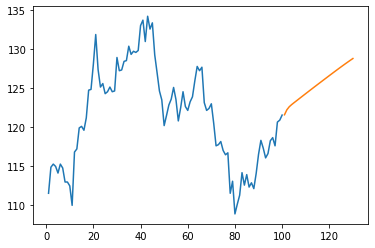

In [ ]:
plt.plot(day_new, scaler.inverse_transform(stock_close[1935:]))
plt.plot(day_pred, scaler.inverse_transform(lst_op))